<a href="https://colab.research.google.com/github/X4D0/DataVisualization/blob/main/Assignment1_1301184233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment
####IF-42-GAB03
####Rayhan Rahmanda (1301184233)

Import necessary library

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
### type your answer here
df_can.set_index('Country', inplace=True) # Menjadikan Country sebagai Index, agar pada saat plot index nya bukan Angka tetapi Nama Negaranya
data_chindia = df_can.loc[['China','India']] # Mencari baris yang isinya "China" dan "India"
df_chindia = data_chindia.iloc[:,4:37] # Kolom yang dibaca hanya angka di tiap tahun, dan Tanpa Kolom Total
df_chindia

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

Text(0, 0.5, 'Imigran')

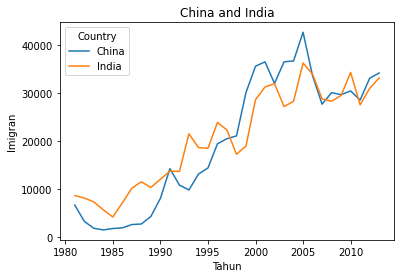

In [ ]:
### type your answer here
df_chindia = df_chindia.transpose() # Transpose agar Tahun nya menjadi row, agar dapat dibaca saat Plotting
plotna = df_chindia.plot(kind='line',title="China and India")
plotna.set_xlabel("Tahun")
plotna.set_ylabel("Imigran")

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Text(0, 0.5, 'Imigran')

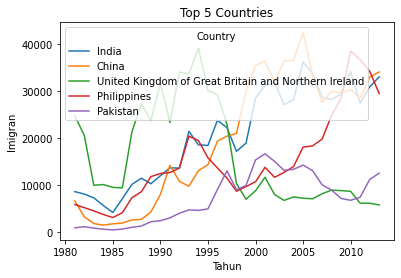

In [ ]:
### type your answer here
df_can = df_can.sort_values(by="Total",ascending=False) # Mengurutkan Data berdasarkan Total Immigrant
top5 = df_can.iloc[:,4:37]
data_top5 = top5.head(5)
data_top5 = data_top5.transpose()
plot5 = data_top5.plot(kind='line',title="Top 5 Countries")
plot5.set_xlabel("Tahun")
plot5.set_ylabel("Imigran")

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

Text(0, 0.5, 'Imigran')

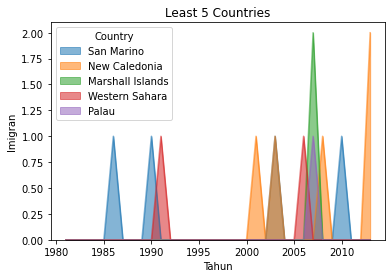

In [ ]:
### type your answer here
data_top5 = top5.tail(5) # Data terendah (Jumlah Imigran paling sedikit)
data_top5 = data_top5.transpose()
plot5 = data_top5.plot(kind='area',alpha=0.55,stacked=False,title="Least 5 Countries")
plot5.set_xlabel("Tahun")
plot5.set_ylabel("Imigran")

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

Text(0, 0.5, 'Tahun')

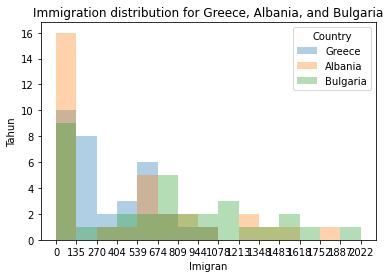

In [ ]:
### type your answer here
data_GAB = df_can.loc[['Greece','Albania','Bulgaria']]
data_GAB = data_GAB.iloc[:,4:37]
plot_GAB = data_GAB.transpose()
n,bins = np.histogram(plot_GAB,15)
plot3 = plot_GAB.plot(kind ='hist',bins=15,alpha=0.35,xticks=bins,title="Immigration distribution for Greece, Albania, and Bulgaria")
plot3.set_xlabel("Imigran")
plot3.set_ylabel("Tahun")

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
### type your answer here
data_top15 = df_can['Total'].head(15) # Hanya perlu membaca Total Immigrant saja
data_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

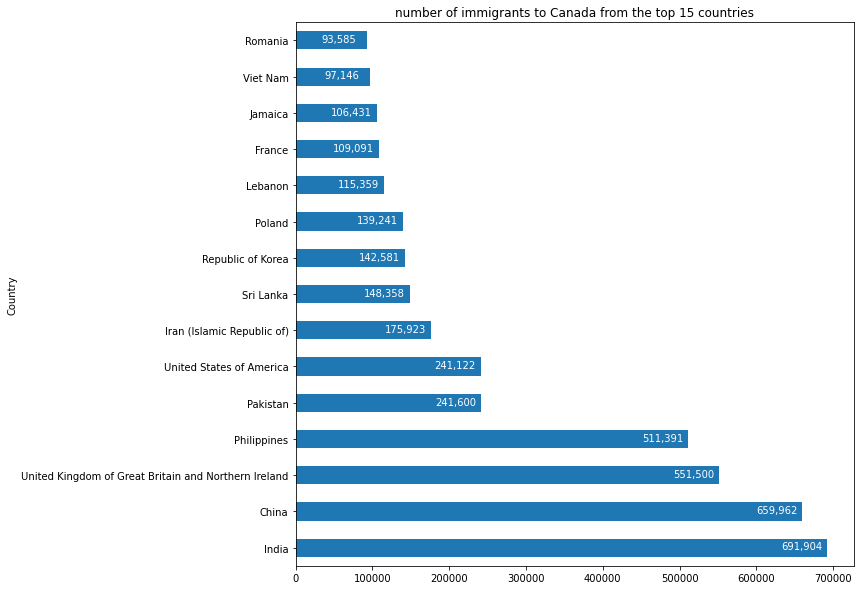

In [ ]:
### type your answer here
plot_15 = data_top15.plot(kind='barh',figsize=(10,10),title="number of immigrants to Canada from the top 15 countries")
for index, value in enumerate(data_top15):
  label = format(int(value), ',')
  plot_15.annotate(label,xy=(value-60000, index-0.05),color='White')
plot_15


# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).